# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="pizza1.png" alt="Pizza-1" style="width: 400px;"/>

**Step-1** : Initialise Pizza Parlour Centers randomly.
<img src="pizza2.png" alt="Pizza-2" style="width: 400px;"/>

**Step-2** : Assign each customer to its nearest Pizza Center.
<img src="pizza3.png" alt="Pizza-3" style="width: 400px;"/>

**Step-3** : Update the Center Location by taking mean of customers assigned to it.
<img src="pizza4.png" alt="Pizza-4" style="width: 400px;"/>

**Step-4** : Repeat Steps 2 and 3 Until Convergence.
<img src="pizza5.png" alt="Pizza-5" style="width: 400px;"/>

# Implementation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or ndarray of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers mus

# Dataset Preparation

In [29]:
X,y=make_blobs(n_samples=100,n_features=2, centers=5,random_state=3)

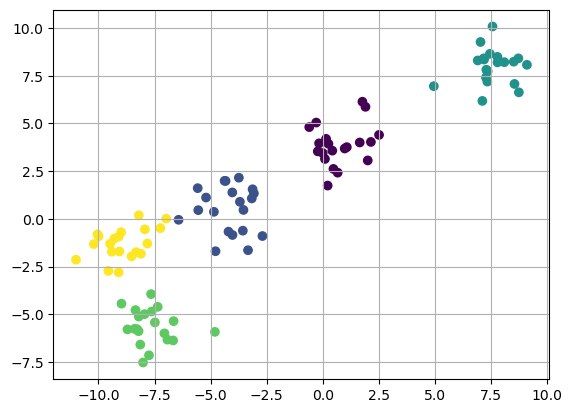

In [30]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# Lets define K

In [31]:
# Let's define k 
k = 5

color = ['green', 'red', 'blue', 'yellow', 'gray']
clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center, 
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster
    


In [32]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [33]:
# Assign every data point to one of the clusters 
def assignPointToClusters(clusters): #E-step 

    for ix in range(X.shape[0]):
        
        dist = []
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center'])
            dist.append(d)
            
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(X[ix])
    

In [34]:
def updateClusters(clusters): #M-Step -> We update every cluster center according to the mean of the points
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: # if cluster has some non-zero points
            new_mean = pts.mean(axis=0)
            clusters[kx]['center'] = new_mean
            #clear my points list 
            clusters[kx]['points'] = []      
        

In [35]:
def plotClusters(clusters):
    
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(pts[:,0], pts[:,1], color=clusters[kx]['color'])
        except:
            pass
        
        # plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color='black', marker='*')




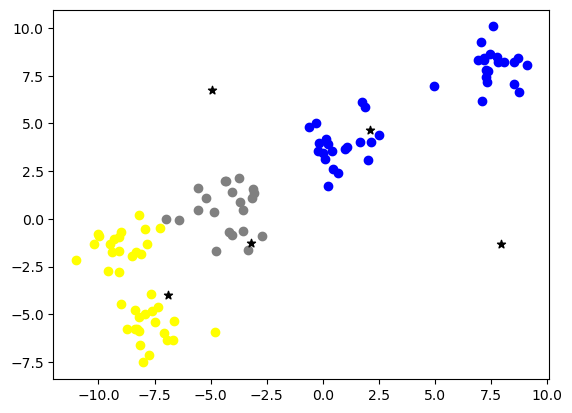

In [36]:
assignPointToClusters(clusters)
plotClusters(clusters)

In [37]:
# Repeat the process of step 2 and step 3 until convergence 

count =1 
while True:
    assignPointToClusters(clusters)
    updateClusters(clusters)
    count+=1
    if count>1000:
        break

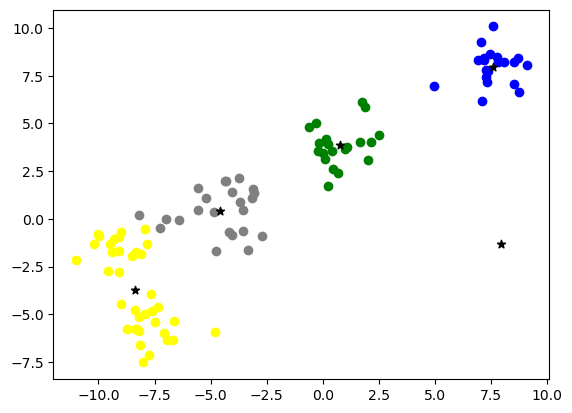

In [38]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)